# dataset Iris

In [1]:
!pip install minisom

Defaulting to user installation because normal site-packages is not writeable
  Using cached MiniSom-2.3.1-py3-none-any.whl


In [29]:
from numpy import genfromtxt, array, linalg, zeros, apply_along_axis

In [30]:
base = genfromtxt('iris.csv', delimiter=',', usecols=(0,1,2,3))
base = apply_along_axis(lambda x: x/linalg.norm(x),1, base)

## Nessa etapa estamos criando o mapa auto organizado de Kohonen

In [31]:
from minisom import MiniSom
from minisom import *
# Inicialização do treino
mapa = MiniSom(7,7,4,sigma=1, learning_rate=0.5)
mapa.random_weights_init(base)
mapa.train_random(base, 100)

## Essa Etapa é a saída gráfica do Mapa

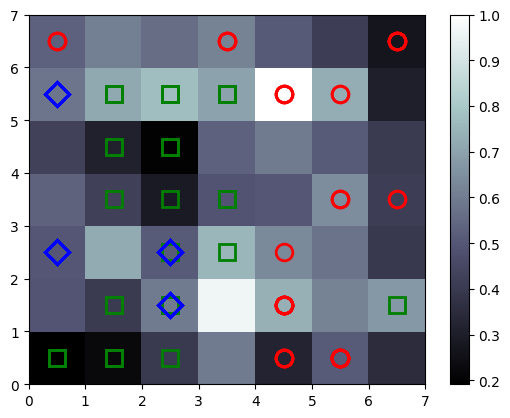

In [36]:
from pylab import plot, show, axis, pcolor, colorbar, bone
bone()
pcolor(mapa.distance_map().T)
colorbar()
# Carregando as referências:
plantas = genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
codigo = zeros(len(plantas), dtype=int)
codigo[plantas == 'setosa']=0
codigo[plantas == 'versicolor']=1
codigo[plantas == 'virginica']=2
marcador = ['o','s','D']
cores = ['r','g','b']
for indice, saida in enumerate(base):
    m = mapa.winner(saida)
    plot(m[0]+0.5,m[1]+0.5,
         marcador[codigo[indice]],
         markerfacecolor='None',
         markeredgecolor=cores[codigo[indice]],
         markersize=12,
         markeredgewidth=2,
        )
#axis([0,mapa.get_weights(),0,mapa.ge)
show()